# Assignment 1

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()


     |████████████████████████████████| 727kB 17.9MB/s 
     |████████████████████████████████| 194kB 54.0MB/s 
     |████████████████████████████████| 51kB 9.0MB/s 
     |████████████████████████████████| 1.2MB 55.7MB/s 
     |████████████████████████████████| 61kB 10.7MB/s 
Mounted at /content/gdrive


**First dog \ cat classifier**

In [ ]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

#function to check the first char and determine if the image is a dog
def is_dog(x):
  return x[0].islower()

dls = ImageDataLoaders.from_name_func(path, get_image_files(path), 
          valid_pct=0.2, seed=42, label_func=is_dog, item_tfms=Resize(64))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.857431,0.528748,0.220568,00:36


epoch,train_loss,valid_loss,error_rate,time
0,0.464088,0.288530,0.123816,00:36


In [ ]:
#need to upload two images.
from ipywidgets import FileUpload
uploader = FileUpload(multiple=True)
uploader

FileUpload(value={}, description='Upload', multiple=True)

In [ ]:
#testing with cat picture
test_cat_image = PILImage.create(uploader.data[0])
is_dog,_,probs = learn.predict(test_cat_image)

print(f"Is this a dog?: {is_dog}.")
print(f"Probability its a dog: {probs[1].item()}")

Is this a dog?: False.
Probability its a dog: 0.0019121369114145637


In [ ]:
#testing with dog picture
test_dog_image = PILImage.create(uploader.data[1])
is_dog,_,probs = learn.predict(test_dog_image)

print(f"Is this a dog?: {is_dog}.")
print(f"Probability its a dog: {probs[1].item()}")

Is this a dog?: True.
Probability its a dog: 0.9979057312011719


**Segmentation model**

In [ ]:
import numpy as np
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func( path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}', codes = np.loadtxt(path/'codes.txt', dtype=str))

learn = unet_learner(dls, resnet34)
learn.fine_tune(1)

epoch,train_loss,valid_loss,time
0,3.184812,2.532895,00:01


epoch,train_loss,valid_loss,time
0,1.867968,1.555328,00:01


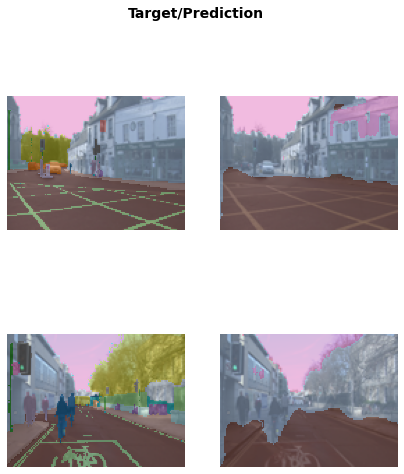

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))

In [ ]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.458381,0.403363,0.816560,03:44


epoch,train_loss,valid_loss,accuracy,time
0,0.307624,0.346697,0.842720,07:26
1,0.244655,0.237126,0.902200,07:27
2,0.192799,0.191076,0.928920,07:28
3,0.157814,0.192636,0.928840,07:27


In [ ]:
learn.predict("This movie is entertaining. I would reccomend it to a friend")

('pos', tensor(1), tensor([1.3612e-04, 9.9986e-01]))

In [ ]:
learn.predict("The movie is boring. Acting is poor")

('neg', tensor(0), tensor([0.9979, 0.0021]))

In [ ]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names='salary',
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',  'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.366281,0.368004,0.832924,00:05
1,0.362239,0.357411,0.836456,00:05
2,0.358782,0.354110,0.838606,00:04


In [ ]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5, 5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.523505,1.370894,00:00


epoch,train_loss,valid_loss,time
0,1.376641,1.314423,00:00
1,1.269486,1.149268,00:00
2,1.038812,0.872797,00:00
3,0.808577,0.739604,00:00
4,0.683574,0.704792,00:00
5,0.637614,0.692062,00:00
6,0.612353,0.687290,00:00
7,0.601213,0.683959,00:00
8,0.591572,0.683395,00:00
9,0.588204,0.683203,00:00


In [ ]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,41.0,40.0,4.0,3.365139
1,89.0,35.0,4.0,4.019029
2,8.0,87.0,2.5,3.487842
3,33.0,10.0,2.0,2.510370
4,38.0,20.0,5.0,4.344522
5,1.0,84.0,5.0,3.667416
6,98.0,8.0,4.5,4.371114
7,2.0,94.0,1.5,3.389549
8,27.0,68.0,1.5,3.339740
